## Packages and Assets

In [4]:
import keras.models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import seaborn as sns
import json
import matplotlib.pyplot as plt
import numpy as np

from keras.preprocessing.text import tokenizer_from_json

from keras.utils import pad_sequences
import pandas as pd
import re
import string
import nltk


## Dependencies

In [5]:
test_pp = pd.read_csv('../../assets/data/splits/test/preprocessed.csv')
test_pp

,title,tags,url,time,label
0,magazine luiza acao indicada investir semana v...,"['Ações', 'Ativa Investimentos', 'BTG Pactual'...",https://www.moneytimes.com.br/magazine-luiza-e...,12:49:00,0
1,ibovespa engata <NUM> alta fecha acima <NUM> m...,"['Azul', 'B2W', 'Banco do Brasil', 'Bradesco',...",https://www.moneytimes.com.br/ibovespa-engata-...,18:10:00,0
2,dividendos petrobras valem risco investir estatal,"['Ações', 'Comprar ou vender?', 'Empresas', 'G...",https://www.moneytimes.com.br/dividendos-da-pe...,13:27:00,1
3,petroleiros norte fluminense aprovam acordo pe...,"['Combustíveis', 'Empresas', 'Petrobras', 'Pet...",https://www.moneytimes.com.br/petroleiros-do-n...,17:02:00,0
4,diretor governanca conformidade petrobras plan...,"['Carreira', 'Empresas', 'Petrobras', 'Petróle...",https://www.moneytimes.com.br/diretor-de-gover...,12:56:00,0
...,...,...,...,...,...
199,ibovespa fecha alta nova york reduz impeto,"['Azul', 'B3', 'Banco Central', 'BR Malls', 'B...",https://www.moneytimes.com.br/ibovespa-fecha-e...,17:10:00,1
200,petrobras reduz diesel gasolina refinarias <NU...,"['Combustíveis', 'Diesel', 'Dólar', 'Gasolina'...",https://www.moneytimes.com.br/petrobras-reduz-...,10:40:00,1
201,ibovespa fecha alta recuperacao wall street al...,"['Bradesco', 'BRF', 'Coronavírus', 'Cyrela', '...",https://www.moneytimes.com.br/ibovespa-fecha-e...,17:07:00,1
202,petrobras utilizara tecnologia reduzir custos ...,"['Combustíveis', 'Empresas', 'Gás', 'Petrobras...",https://www.moneytimes.com.br/petrobras-utiliz...,17:06:00,1


In [6]:
model = keras.models.load_model('../../assets/deep_assets/lstm_model')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 8, 300)            869100    
                                                                 
 bidirectional_2 (Bidirectio  (None, 8, 128)           186880    
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 8, 128)            0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 32)               18560     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 1)                

In [7]:
# Load the tokenizer from the file
with open('../../assets/deep_assets/tokenizer.json', 'r', encoding='utf-8') as f:
    tokenizer_json = f.read()
    tokenizer = tokenizer_from_json(tokenizer_json)
    word_index = tokenizer.word_index

## Predictions considering best deep model

In [8]:
X_test = test_pp.title
y_test = test_pp.to_numpy()[:, -1]

test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences, maxlen=8, padding='post', truncating='post')
test_padded

array([[  67,   68,   33, ...,   26,   38, 1264],
       [   4,  308,    2, ...,  173,    2,   19],
       [  34,    3, 1798, ...,  175,    0,    0],
       ...,
       [   4,    9,    7, ...,   83,    7,   15],
       [   3,    1,  815, ...,   57,  523,   29],
       [   3,    6, 1811, ...,  439, 2851,  149]])

### Functions

In [9]:
def index2word(word_index):
    index_word = {}
    for key in word_index:
        index_word[word_index[key]] = key
    return index_word


def seq2text(seq, index_word):
    text = []
    for index in seq:
        text.append(index_word[index])
    return text

def show_confusion_matrix(cm):
        print("Confusion Matrix")
        plt.figure(figsize=(10, 7))

        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'],
                    yticklabels=['Negative', 'Positive'])
        plt.xlabel('Predicted')
        plt.ylabel('Truth')
        plt.title('Confusion Matrix')
        plt.show()

In [10]:
index_word = index2word(word_index)

In [11]:
pred_prob = model.predict(test_padded)

7/7 [==============================] - 3s 6ms/step


In [12]:
# y_pred = [1 if p > 0.5 else 0 for p in pred_prob]
y_pred = np.argmax(pred_prob, axis=1)

In [13]:
df_results = pd.DataFrame()
X_test = list(X_test)
y_test = list(y_test)
df_results['sequence'] = test_sequences
df_results['X_test'] = X_test
df_results['seq2text'] = df_results['sequence'].apply(lambda x: seq2text(x, index_word))
df_results['y_pred'] = y_pred
df_results['y_true'] = y_test
df_results

,sequence,X_test,seq2text,y_pred,y_true
0,"[67, 68, 33, 1008, 220, 26, 38, 1264]",magazine luiza acao indicada investir semana v...,"[magazine, luiza, acao, indicada, investir, se...",0,0
1,"[4, 308, 2, 7, 9, 173, 2, 19, 16, 226, 2687]",ibovespa engata <NUM> alta fecha acima <NUM> m...,"[ibovespa, engata, num, alta, fecha, acima, nu...",0,0
2,"[34, 3, 1798, 85, 220, 175]",dividendos petrobras valem risco investir estatal,"[dividendos, petrobras, valem, risco, investir...",0,1
3,"[614, 708, 1, 1196, 84, 3]",petroleiros norte fluminense aprovam acordo pe...,"[petroleiros, norte, <OOV>, aprovam, acordo, p...",0,0
4,"[302, 881, 2081, 3, 574, 1, 298, 825]",diretor governanca conformidade petrobras plan...,"[diretor, governanca, conformidade, petrobras,...",0,0
...,...,...,...,...,...
199,"[4, 9, 7, 31, 587, 88, 1775]",ibovespa fecha alta nova york reduz impeto,"[ibovespa, fecha, alta, nova, york, reduz, imp...",0,1
200,"[3, 88, 21, 14, 42, 2, 1]",petrobras reduz diesel gasolina refinarias <NU...,"[petrobras, reduz, diesel, gasolina, refinaria...",0,1
201,"[4, 9, 7, 96, 71, 83, 7, 15]",ibovespa fecha alta recuperacao wall street al...,"[ibovespa, fecha, alta, recuperacao, wall, str...",0,1
202,"[3, 1, 815, 433, 1, 57, 523, 29]",petrobras utilizara tecnologia reduzir custos ...,"[petrobras, <OOV>, tecnologia, reduzir, <OOV>,...",0,1


### Metrics

In [14]:
# accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
# precision = precision_score(average='macro', y_true=y_test, y_pred=y_pred)
# recall = recall_score(average='macro', y_true=y_test, y_pred=y_pred)
# f1 = f1_score(average='macro', y_true=y_test, y_pred=y_pred)
# cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

C:\Users\Guilherme\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Guilherme\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Guilherme\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

              precision    recall  f1-score   support

           0       0.53      1.00      0.70       109
           1       0.00      0.00      0.00        95

    accuracy                           0.53       204
   macro avg       0.27      0.50      0.35       204
weighted avg       0.29      0.53      0.37       204

Confusion Matrix


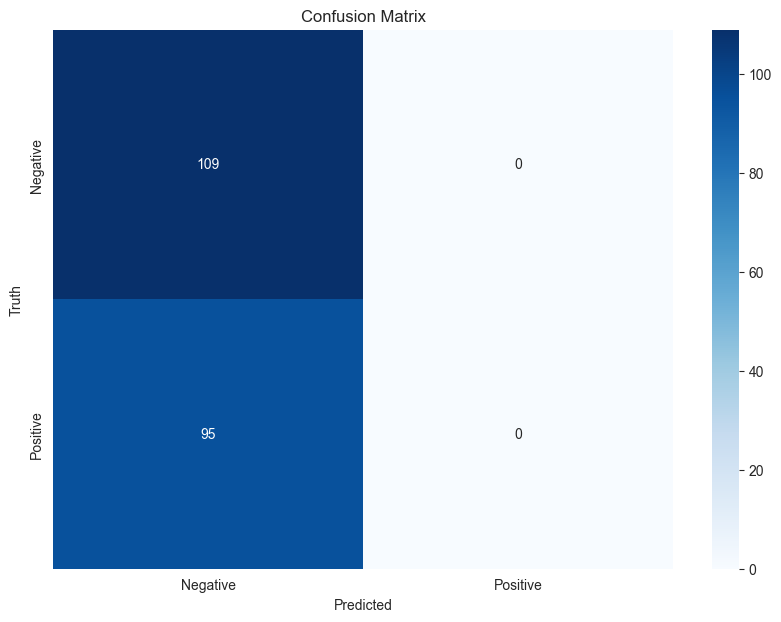

In [15]:
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
show_confusion_matrix(cm)